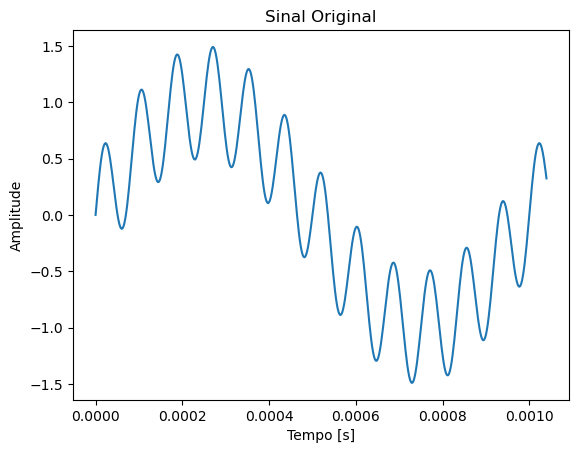

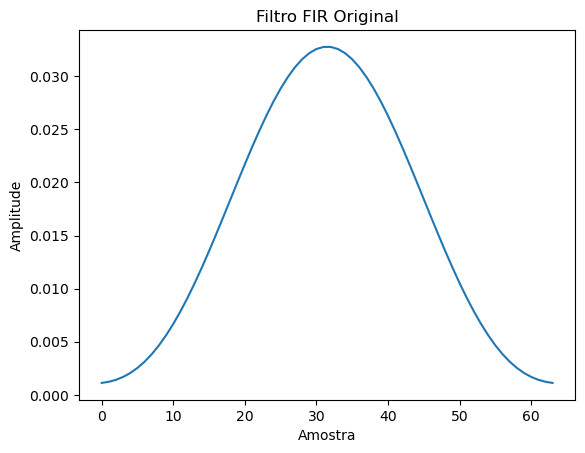

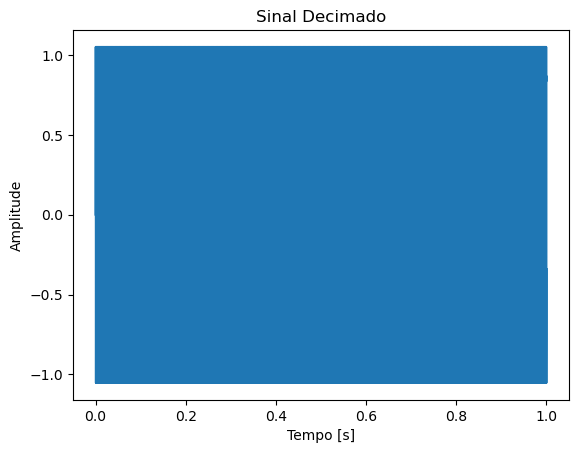

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Definir parâmetros
fs = 480000  # Frequência de amostragem (Hz)
cutoff = 5000  # Frequência de corte (Hz)
numtaps = 64  # Número de coeficientes do filtro FIR (taps)
decimation_factor = 4  # Fator de decimação

# Criar um sinal de exemplo (2 tons: 1 kHz e 12 kHz)
t = np.arange(0, 1.0, 1.0 / fs)  # Tempo (1 segundo de sinal)
signal = np.sin(2 * np.pi * 1000 * t) + 0.5 * np.sin(2 * np.pi * 12000 * t)  # Sinal com 2 tons

# Visualizar o sinal original
plt.figure()
plt.plot(t[:500], signal[:500])
plt.title('Sinal Original')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.show()

# Projeto de um filtro FIR passa-baixa com base na frequência de corte e no número de taps
fir_filter = firwin(numtaps, cutoff / (fs / 2))

# Separar o filtro em 4 fases para a implementação polifásica
filters = [fir_filter[i::decimation_factor] for i in range(decimation_factor)]

# Visualizar o filtro FIR projetado
plt.figure()
plt.plot(fir_filter)
plt.title('Filtro FIR Original')
plt.xlabel('Amostra')
plt.ylabel('Amplitude')
plt.show()

# Inicializar o array de saída para cada fase do sinal decimado
phases = [np.zeros(len(signal) // decimation_factor) for _ in range(decimation_factor)]

# Aplicar cada filtro FIR correspondente a cada fase e fazer a decimação
for i in range(decimation_factor):
    # Aplicar o filtro a cada fase
    filtered_signal = lfilter(filters[i], 1.0, signal[i::decimation_factor])
    
    # Guardar o sinal decimado para essa fase
    phases[i] = filtered_signal

# Combinar as fases para gerar o sinal final decimado
decimated_signal = np.sum(phases, axis=0)

# Visualizar o sinal decimado
plt.figure()
plt.plot(np.arange(0, len(decimated_signal)) / (fs / decimation_factor), decimated_signal)
plt.title('Sinal Decimado')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.show()
